In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow


In [36]:
start='2010-01-01'
end='2022-12-31'

df=yf.download('TSLA', start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [37]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500
2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300
2022-12-30,119.949997,124.480003,119.750000,123.180000,123.180000,157777300


In [38]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [39]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


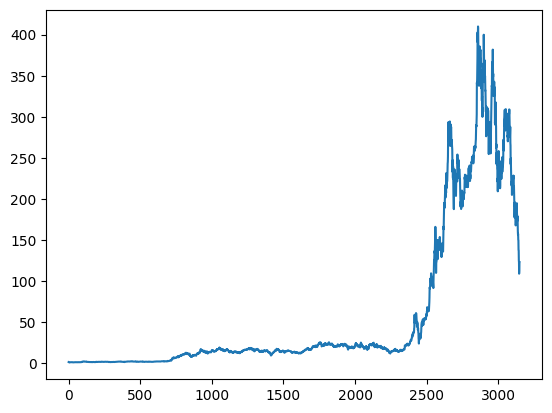

In [40]:
plt.plot(df.Close)

In [41]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3145    234.019467
3146    232.024134
3147    230.269534
3148    228.583501
3149    226.981967
Name: Close, Length: 3150, dtype: float64

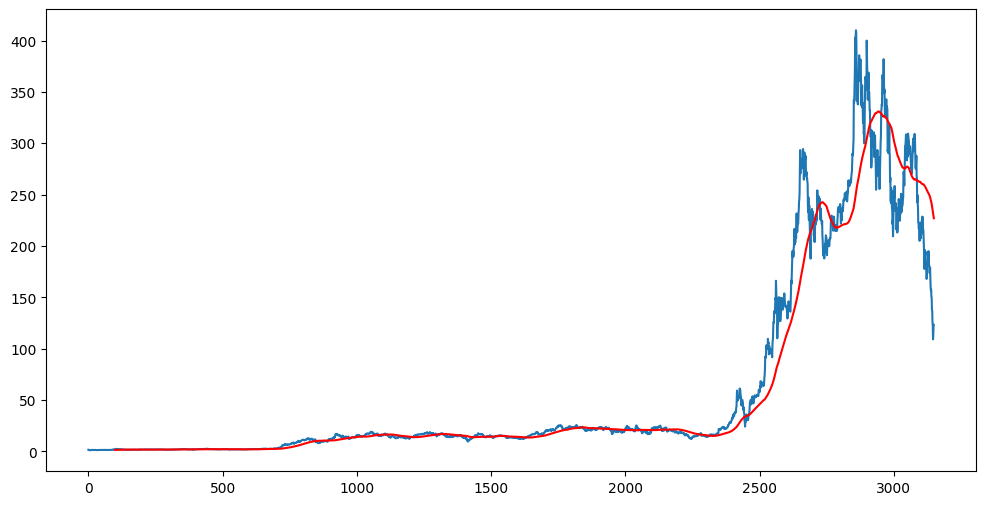

In [42]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [43]:
ma200=df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3145    255.097317
3146    254.317234
3147    253.603501
3148    252.876117
3149    252.091634
Name: Close, Length: 3150, dtype: float64

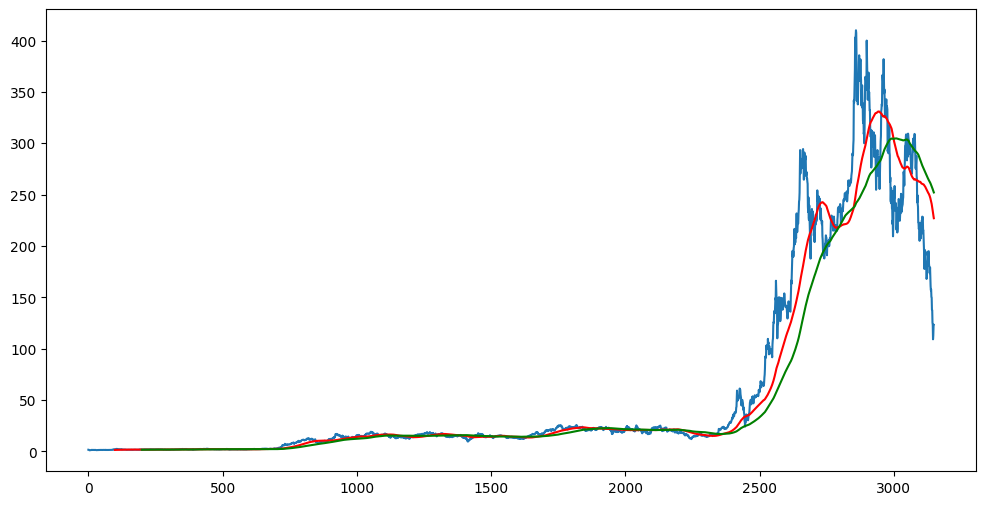

In [44]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [45]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [47]:
data_training_arr=scaler.fit_transform(data_training)
data_training_arr

array([[0.02191227],
       [0.02174975],
       [0.01668473],
       ...,
       [0.71522207],
       [0.74046587],
       [0.73152757]])

In [48]:
data_training_arr.shape

(2205, 1)

In [49]:
x_train=[]
y_train=[]

for i in range(100,data_training_arr.shape[0]):
    x_train.append(data_training_arr[i-100:i])
    y_train.append(data_training_arr[i,0])

x_train=np.array(x_train)
y_train=np.array(y_train)
x_train.shape
    

(2105, 100, 1)

In [50]:
from keras.layers import Dense,  Dropout, LSTM
from keras.models import Sequential , load_model

In [51]:
#model = Sequential()
#model.add(LSTM(units = 40 ,activation = 'relu' , return_sequences = True , input_shape = (x_train.shape[1],1)))
#model.add(Dropout(0.2))
#model.add(LSTM(units = 50 ,activation = 'relu' , return_sequences = True ))
#model.add(Dropout(0.3))
#model.add(LSTM(units = 60 ,activation = 'relu' , return_sequences = True ))
#model.add(Dropout(0.4))
#model.add(LSTM(units = 70 ,activation = 'relu' ))
#model.add(Dropout(0.5))
#model.add(Dense(units= 1))

In [52]:
#model.summary()

In [53]:
#model.compile(optimizer='adam',loss='mean_squared_error')
#model.fit(x_train, y_train,epochs=50)

In [54]:
#model.save('kera_model_stock.h5')


In [55]:
model=load_model('kera_model_stock.h5')

In [56]:
past_100_day=data_training.tail(100)

In [57]:
final_df = pd.concat([data_testing,past_100_day], ignore_index = True)

In [58]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.01889934],
       [0.0148746 ],
       [0.01607717],
       ...,
       [0.01689786],
       [0.01845885],
       [0.01790613]])

In [59]:
input_data.shape

(1045, 1)

In [60]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])


In [61]:
x_test=np.array(x_test)
y_test=np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(945, 100, 1)
(945,)


In [62]:
y_prediction=model.predict(x_test)
y_prediction.shape

30/30 [==============================] - 3s 63ms/step


(945, 1)

In [63]:
y_test

array([0.00603459, 0.0058805 , 0.00613341, 0.00715844, 0.00781164,
       0.00771115, 0.00698592, 0.00847656, 0.00811981, 0.00884671,
       0.00947479, 0.01141095, 0.01120494, 0.01109273, 0.01069243,
       0.01102405, 0.01080633, 0.01132721, 0.01032563, 0.0104278 ,
       0.00740967, 0.00832918, 0.01065056, 0.01057854, 0.01036751,
       0.01100731, 0.01074603, 0.0090544 , 0.00878642, 0.00983992,
       0.01023016, 0.01098051, 0.01101568, 0.01154327, 0.01306238,
       0.01321815, 0.01352968, 0.0139015 , 0.01306071, 0.01248288,
       0.01283125, 0.01268051, 0.02021747, 0.0249825 , 0.02491216,
       0.02298772, 0.02278506, 0.02276998, 0.02250033, 0.02319708,
       0.02315521, 0.02472289, 0.02622358, 0.02649156, 0.0278231 ,
       0.02863374, 0.02799393, 0.0285366 , 0.02900891, 0.02864378,
       0.03023995, 0.02901728, 0.02945442, 0.02580487, 0.02635757,
       0.02511481, 0.02551176, 0.02528565, 0.02611137, 0.02633413,
       0.02580319, 0.02535767, 0.02628221, 0.02689186, 0.02845

In [64]:
y_prediction

array([[0.1311593 ],
       [0.13109875],
       [0.13103622],
       [0.13097104],
       [0.13090354],
       [0.13083607],
       [0.13077188],
       [0.13071403],
       [0.13066247],
       [0.13062057],
       [0.13058862],
       [0.13056794],
       [0.13055888],
       [0.13056514],
       [0.13058797],
       [0.1306276 ],
       [0.13068202],
       [0.13074926],
       [0.13082567],
       [0.13090926],
       [0.13099521],
       [0.13108137],
       [0.1311588 ],
       [0.1312226 ],
       [0.13127351],
       [0.13131276],
       [0.13134196],
       [0.13136467],
       [0.13138416],
       [0.13140002],
       [0.13141122],
       [0.1314188 ],
       [0.13142368],
       [0.13142833],
       [0.13143444],
       [0.13144386],
       [0.1314606 ],
       [0.13148728],
       [0.13152605],
       [0.13157845],
       [0.13164315],
       [0.1317167 ],
       [0.13179612],
       [0.13187528],
       [0.1319629 ],
       [0.13207358],
       [0.13221875],
       [0.132

In [65]:
scaler.scale_

array([0.00251232])

In [66]:
scf = 1/scaler.scale_
y_pred=y_prediction*scf
y_test=y_test*scf

In [67]:
y_pred.shape

(945, 1)

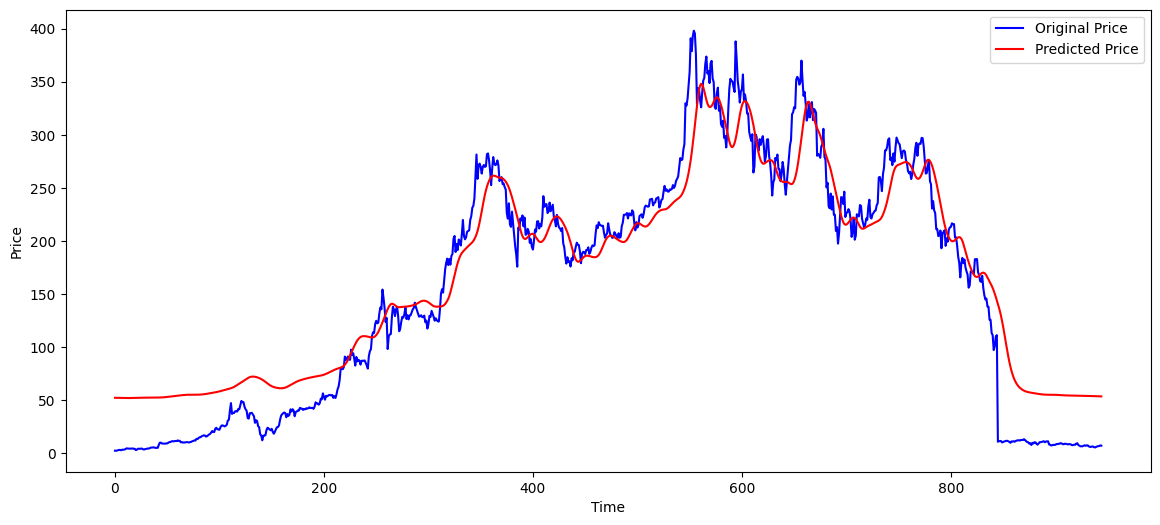

In [68]:
plt.figure(figsize=(14,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_pred,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
